In [1]:
import zipfile
with zipfile.ZipFile("data/mnist.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 35.6/35.6 MB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [160]:
img_list = []
labels= []
for file in glob.glob("data/New folder/*/*.*"):
    img = cv2.imread(file,0)
    img = cv2.resize(img,(25,25))
    img_list.append(np.array(img).ravel())
    labels.append(os.path.basename(file).split("-")[0]) 


In [146]:
cols = ["Pixel_"+ str(i) for i in range(625)]

In [161]:
X = pd.DataFrame(np.array(img_list),columns=cols)
y = pd.DataFrame(np.array(labels),columns=['label'])


In [162]:
X.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_615,Pixel_616,Pixel_617,Pixel_618,Pixel_619,Pixel_620,Pixel_621,Pixel_622,Pixel_623,Pixel_624
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PNG
L


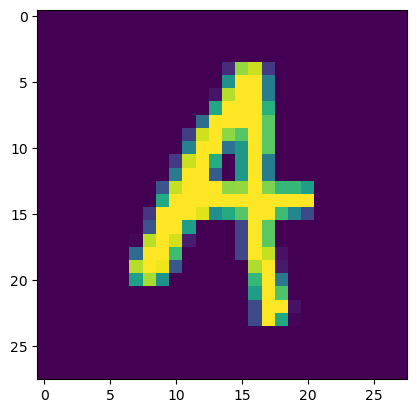

In [163]:
# Python program to read
# image using PIL module
 
# importing PIL
from PIL import Image
import matplotlib.pyplot as plt
# Read image
img = Image.open('data/New folder/A/A-0.png')
 
plt.imshow(img)
 
# prints format of image
print(img.format)
 
# prints mode of image
print(img.mode)

(25, 25)
label    O
Name: 155000, dtype: object


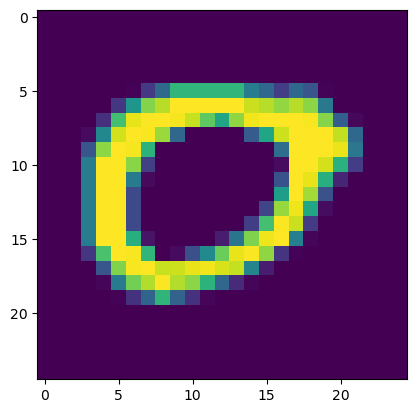

In [179]:
i=155000
img = np.reshape(X.values[i], (25,25))
print(img.shape)
plt.imshow(img)
print(y.iloc[i])

In [165]:
y.value_counts()

label
O        57825
S        48419
U        29008
C        23409
T        22495
P        19341
N        19010
A        13870
M        12336
L        11586
R        11566
E        11440
Y        10859
W        10784
D        10134
B         8668
J         8493
H         7218
X         6272
Z         6076
Q         5812
G         5762
K         5603
V         4182
F         1163
I         1120
dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=73)

In [95]:
y_test.size

93113

In [96]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [97]:
nb.fit(X_train, y_train)

C:\Users\Murali Krishna\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [98]:
import seaborn as sns
y_test_pred = nb.predict(X_test)



In [99]:
type(y_test)

pandas.core.frame.DataFrame

In [100]:
import sklearn.metrics as metrics

Accuracy:  0.6947902011534373


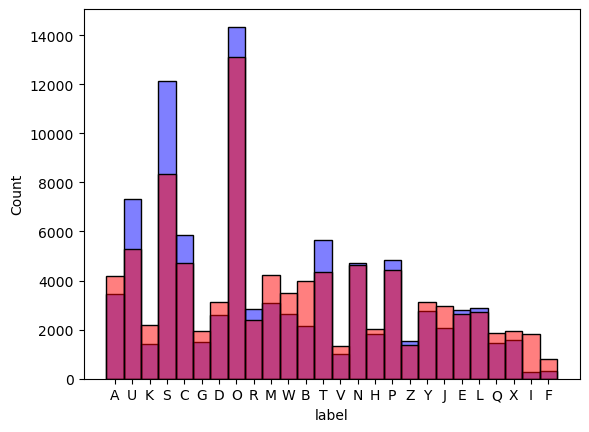

In [101]:
sns.histplot(y_test['label'], color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test['label'], y_test_pred)

0.9520689914405077

In [212]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)



C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_15296\790854262.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier()

In [213]:
y_test_pred = classifier.predict(X_test)

metrics.accuracy_score(y_test['label'], y_test_pred)

0.9866828477226596

In [105]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

C:\Users\Murali Krishna\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Murali Krishna\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_test_pred = LRclassifier.predict(X_test)

In [107]:
from sklearn import metrics

metrics.accuracy_score(y_test['label'], y_test_pred)

0.8763115784047341

In [226]:
25*25


625

## Testing

In [242]:
file = "data/test/a1.jpg"
temp_list=[]
img = cv2.imread(file,0)
img.resize(25,25)
#temp_list.append(np.array(img).ravel())

#img_test_temp = pd.DataFrame(np.array(temp_list),columns=cols)
#print(classifier.predict(img_test_temp))
print(classifier.predict(img.reshape(1,625)))

['C']


C:\Users\Murali Krishna\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [223]:
i=350
print(classifier.predict((X_test.iloc[i].values).reshape(1,-1)),y_test.iloc[i])

['A'] label    A
Name: 3959, dtype: object


C:\Users\Murali Krishna\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


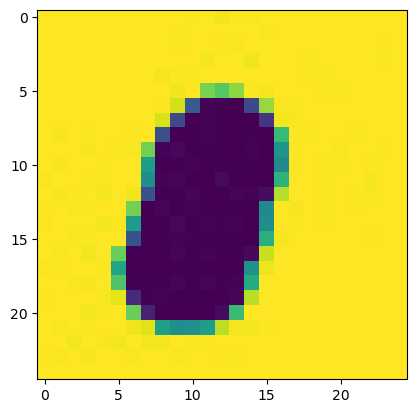

In [243]:


plt.imshow(img)